In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import pickle

In [2]:
data_folder = '/Users/emiliebertholet/cernbox/coldbox_data'
peak_folder = 'data_tests'

In [3]:
!ls /Users/emiliebertholet/cernbox/coldbox_data

adc_data_run_25036_ch_40_all.npy adc_data_run_25068_ch_37_all.npy
adc_data_run_25050_ch_37_all.npy adc_data_run_25071_ch_37_all.npy
adc_data_run_25066_ch_40_all.npy adc_data_run_25087_ch_37_all.npy


In [4]:
def fast_plot(data):
    fig, axs = plt.subplots(1, 1, figsize=(12, 2))
    axs.plot(data.transpose())
    axs.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
    axs.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");

def substract_peds(row):
    return row - np.argmax(np.bincount(row))

In [5]:
# filename = f'{data_folder}/adc_data_run_25036_ch_40_all.npy' # neutrons
# (16600, 65536): 16600 = "rows"; 65536 = "columns"
filename = f'{data_folder}/adc_data_run_25066_ch_40_all.npy' # cosmcis #(4200, 262144)
data = np.load(filename, allow_pickle=True).astype(np.int16)
print(data.shape)
data_ped = np.apply_along_axis(substract_peds, axis=1, arr=data)
print(data_ped.shape)

(4200, 262144)
(4200, 262144)


(1000.0, 2000.0)

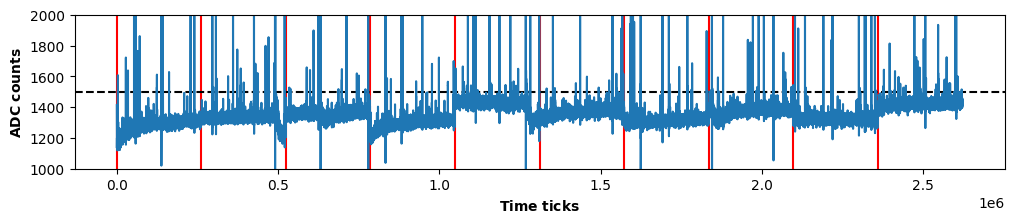

In [6]:

out = data.flatten()[0: 10*data.shape[1]]

fig, ax = plt.subplots(1, 1, figsize=(12, 2))
for i in range(0, 10):
    ax.axvline(x = i*data.shape[1],   color = 'r')
ax.axhline(y = 1500,    color = 'black', linestyle='--')
ax.plot(out.transpose())
ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
ax.set_ylim(1000, 2000)

(-500.0, 500.0)

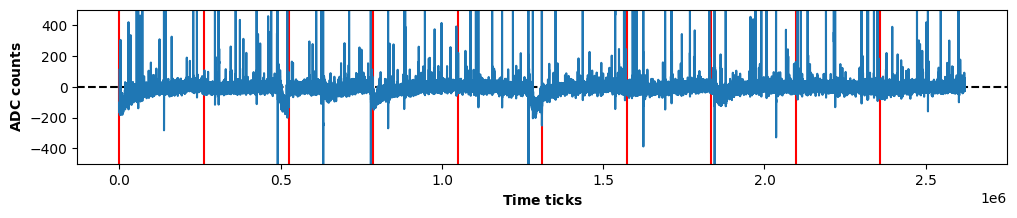

In [7]:
# l, r = 0, 10000 
out = data_ped.flatten().flatten()[0: 10*data.shape[1]]

fig, ax = plt.subplots(1, 1, figsize=(12, 2))
for i in range(0, 10):
    ax.axvline(x = i*data.shape[1],   color = 'r')
ax.axhline(y = 0,    color = 'black', linestyle='--')
ax.plot(out.transpose())
ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
ax.set_ylim(1000, 2000)
ax.set_ylim(-500, 500)